# Classification (supervised learning)

The notebook aims to study and implement classification (supervised learning) using "sklearn". The iris dataset will be used to classify.


## Acknowledgments

- Used dataset: https://archive.ics.uci.edu/ml/datasets/iris

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [352]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily


# Importing data

In [353]:
# Define the col names for the iris dataset
colnames = ["Sepal_Length", "Sepal_Width","Petal_Length","Petal_Width", "Flower"]

# Dataset url
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Load the dataset from HHDD
dataset  = pd.read_csv(url, header = None, names = colnames )

dataset


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [354]:
# Print dataset
print(dataset)


     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width          Flower
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [355]:
# Print dataset shape
dataset.shape


(150, 5)

In [356]:
# Print column names
dataset.columns


Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Flower'], dtype='object')

2. Drop rows with any missing values


In [357]:
# Drop na
dataset.Flower.dropna().describe()


count             150
unique              3
top       Iris-setosa
freq               50
Name: Flower, dtype: object

3. Encoding the class label categorical column: from string to num


In [358]:
# Encoding the categorical column: {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}
mapping = {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}
dataset['Species_Encoded'] = dataset['Flower'].map(mapping)

#Visualize the dataset
dataset

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower,Species_Encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


Now the label/category is numeric


4. Discard columns that won't be used


In [359]:
# Drop out non necesary columns
dataset_cleaned = dataset.drop(columns=['Flower'])


5. Scatter plot of the data

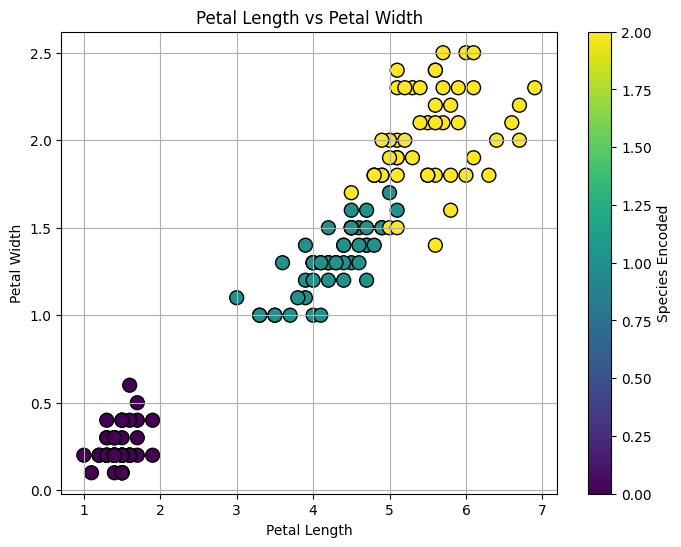

In [360]:
# Scatter plot of Petal_Length vs Petal_Width
plt.figure(figsize=(8,6))
plt.scatter(dataset_cleaned['Petal_Length'], dataset_cleaned['Petal_Width'], c=dataset_cleaned['Species_Encoded'], cmap='viridis', edgecolor='k', s=100)
plt.title('Petal Length vs Petal Width')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.colorbar(label='Species Encoded')
plt.grid(True)
plt.show()



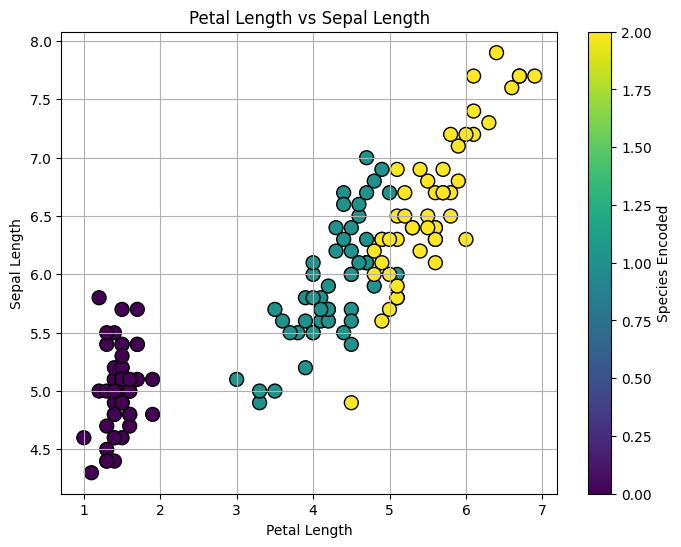

In [361]:
# Scatter plot of Petal_Length vs Sepal_Length
plt.figure(figsize=(8,6))
plt.scatter(dataset_cleaned['Petal_Length'], dataset_cleaned['Sepal_Length'], c=dataset_cleaned['Species_Encoded'], cmap='viridis', edgecolor='k', s=100)
plt.title('Petal Length vs Sepal Length')
plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.colorbar(label='Species Encoded')
plt.grid(True)
plt.show()



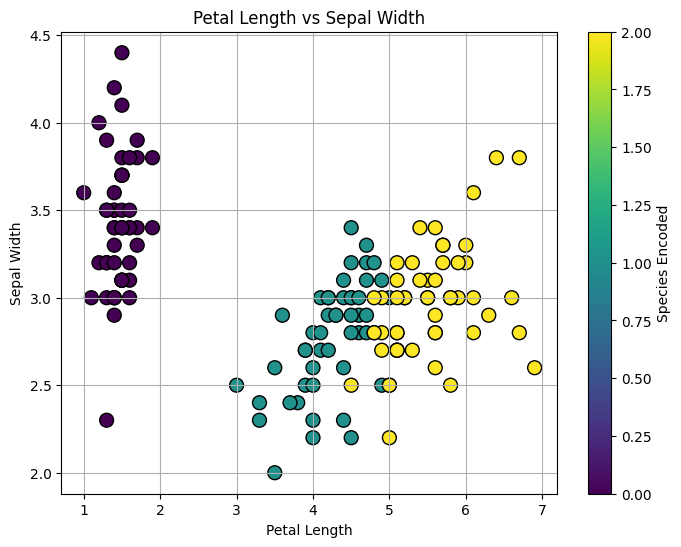

In [362]:
# Scatter plot of Petal_Length vs Sepal_Width
plt.figure(figsize=(8,6))
plt.scatter(dataset_cleaned['Petal_Length'], dataset_cleaned['Sepal_Width'], c=dataset_cleaned['Species_Encoded'], cmap='viridis', edgecolor='k', s=100)
plt.title('Petal Length vs Sepal Width')
plt.xlabel('Petal Length')
plt.ylabel('Sepal Width')
plt.colorbar(label='Species Encoded')
plt.grid(True)
plt.show()




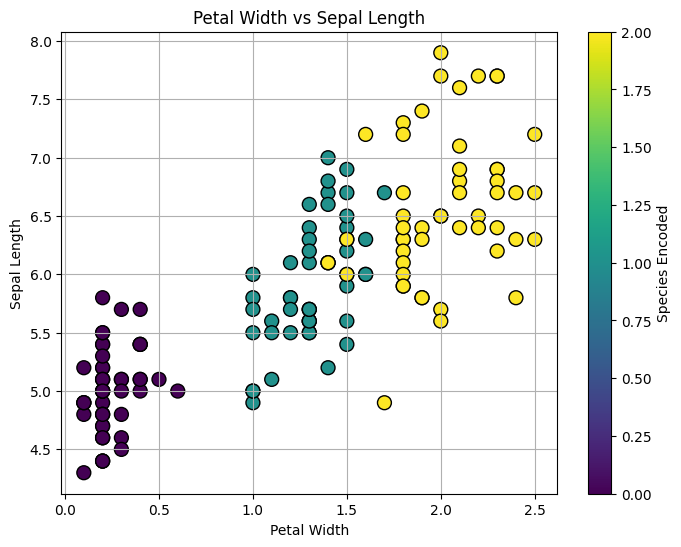

In [363]:
# Scatter plot of Petal_Width vs Sepal_Length
plt.figure(figsize=(8,6))
plt.scatter(dataset_cleaned['Petal_Width'], dataset_cleaned['Sepal_Length'], c=dataset_cleaned['Species_Encoded'], cmap='viridis', edgecolor='k', s=100)
plt.title('Petal Width vs Sepal Length')
plt.xlabel('Petal Width')
plt.ylabel('Sepal Length')
plt.colorbar(label='Species Encoded')
plt.grid(True)
plt.show()



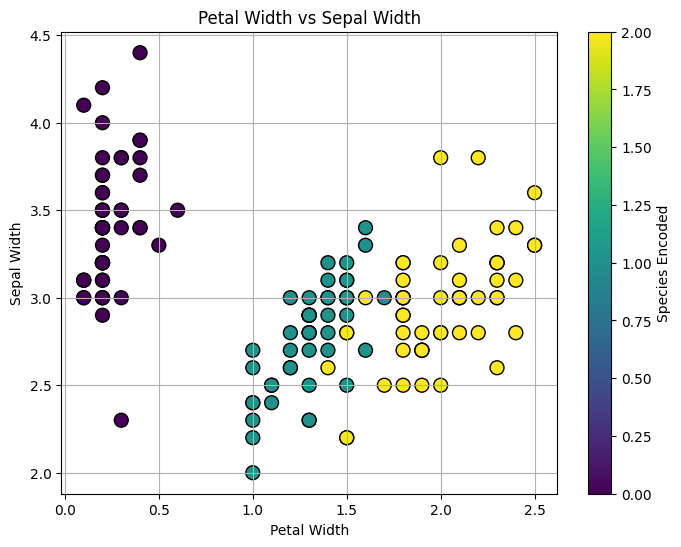

In [364]:
# Scatter plot of Petal_Width vs Sepal_Width
plt.figure(figsize=(8,6))
plt.scatter(dataset_cleaned['Petal_Width'], dataset_cleaned['Sepal_Width'], c=dataset_cleaned['Species_Encoded'], cmap='viridis', edgecolor='k', s=100)
plt.title('Petal Width vs Sepal Width')
plt.xlabel('Petal Width')
plt.ylabel('Sepal Width')
plt.colorbar(label='Species Encoded')
plt.grid(True)
plt.show()



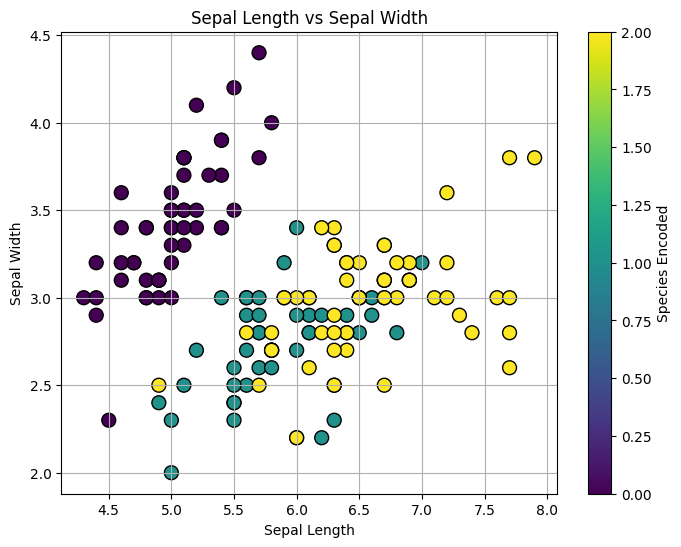

In [365]:
# Scatter plot of Sepal_Length vs Sepal_Width
plt.figure(figsize=(8,6))
plt.scatter(dataset_cleaned['Sepal_Length'], dataset_cleaned['Sepal_Width'], c=dataset_cleaned['Species_Encoded'], cmap='viridis', edgecolor='k', s=100)
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.colorbar(label='Species Encoded')
plt.grid(True)
plt.show()



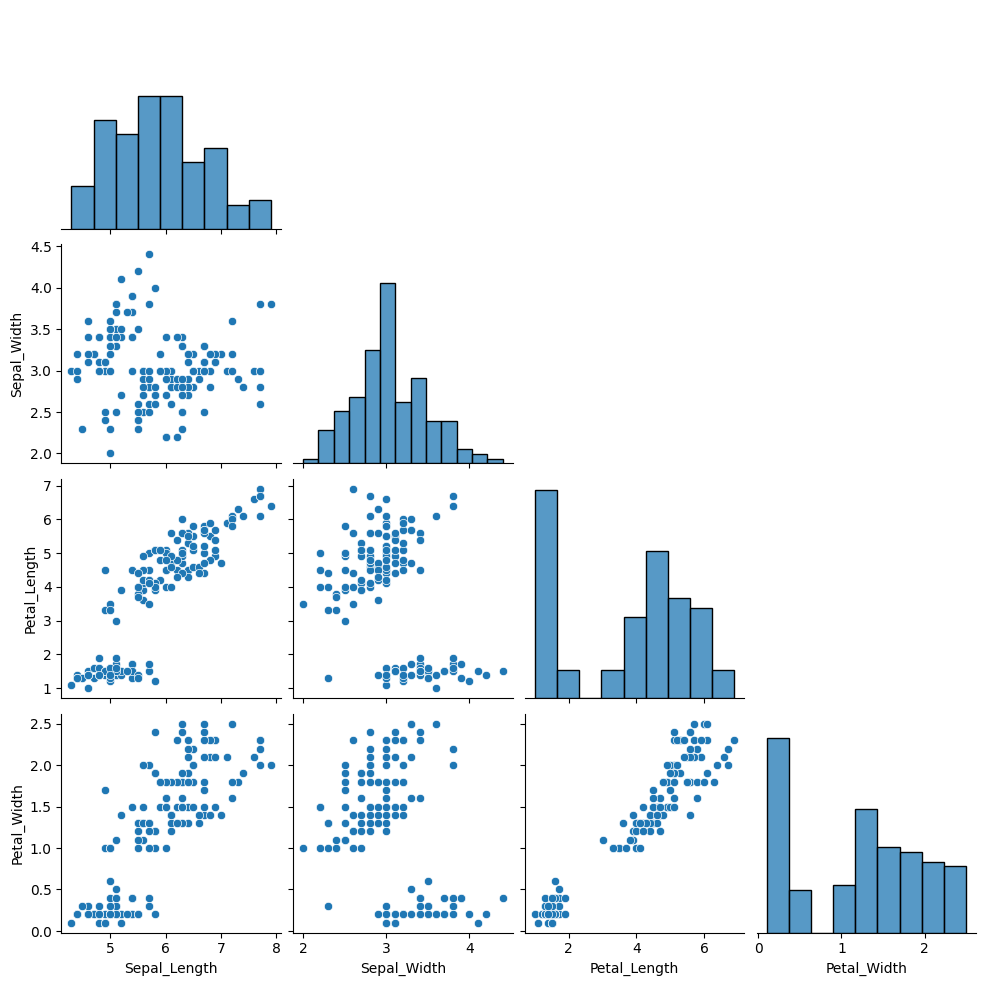

In [366]:
# Pairplot: Scatterplot of all variables (not the flower type)
sns.pairplot(dataset_cleaned.drop(columns=['Species_Encoded']), kind='scatter', diag_kind='hist', corner=True)
plt.show()



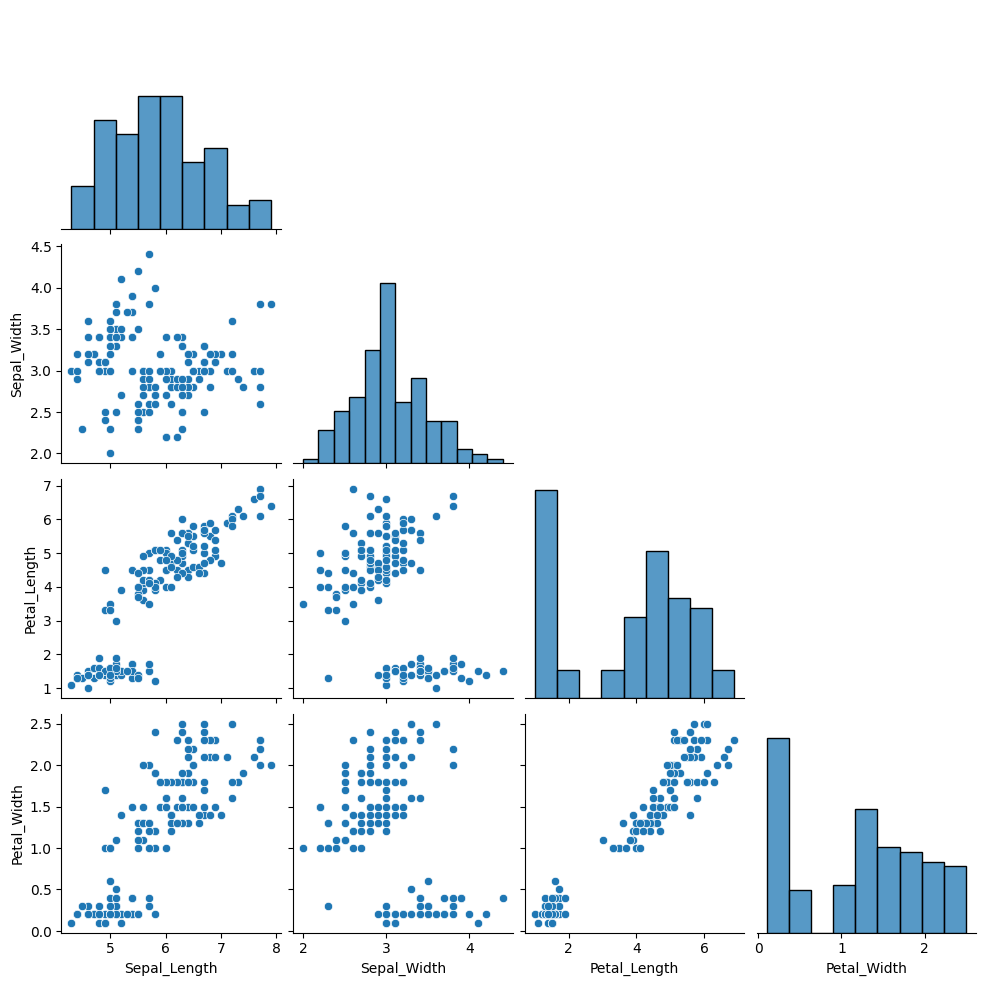

In [367]:
# Pairplot: Scatterplot of all variables (not the flower type)
sns.pairplot(dataset_cleaned.drop(columns=['Species_Encoded']), kind='scatter', diag_kind='hist', corner=True)
plt.show()



6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

In [368]:
# Get dataframes for each real cluster

# Splitting the dataset into three dataframes based on the original species before encoding
df_setosa = dataset[dataset['Species_Encoded'] == 0]
df_versicolor = dataset[dataset['Species_Encoded'] == 1]
df_virginica = dataset[dataset['Species_Encoded'] == 2]

df_setosa
df_versicolor
df_virginica


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower,Species_Encoded
100,6.3,3.3,6.0,2.5,Iris-virginica,2
101,5.8,2.7,5.1,1.9,Iris-virginica,2
102,7.1,3.0,5.9,2.1,Iris-virginica,2
103,6.3,2.9,5.6,1.8,Iris-virginica,2
104,6.5,3.0,5.8,2.2,Iris-virginica,2
105,7.6,3.0,6.6,2.1,Iris-virginica,2
106,4.9,2.5,4.5,1.7,Iris-virginica,2
107,7.3,2.9,6.3,1.8,Iris-virginica,2
108,6.7,2.5,5.8,1.8,Iris-virginica,2
109,7.2,3.6,6.1,2.5,Iris-virginica,2


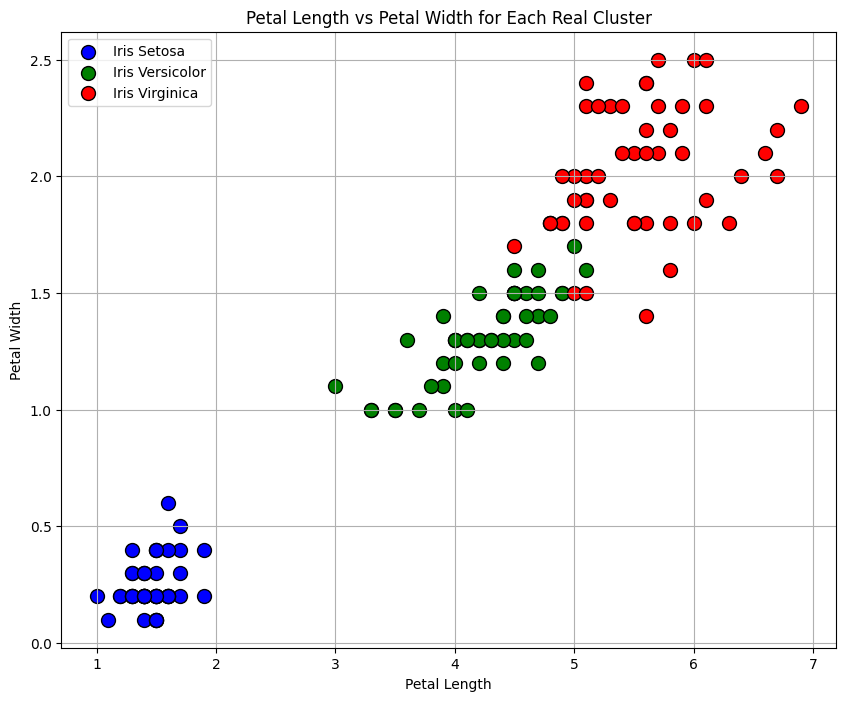

In [369]:
# Scatter plot of each real cluster for Petal

plt.figure(figsize=(10,8))

# Setosa
plt.scatter(df_setosa['Petal_Length'], df_setosa['Petal_Width'], color='blue', label='Iris Setosa', s=100, edgecolor='k')
# Versicolor
plt.scatter(df_versicolor['Petal_Length'], df_versicolor['Petal_Width'], color='green', label='Iris Versicolor', s=100, edgecolor='k')
# Virginica
plt.scatter(df_virginica['Petal_Length'], df_virginica['Petal_Width'], color='red', label='Iris Virginica', s=100, edgecolor='k')

# Plot settings
plt.title('Petal Length vs Petal Width for Each Real Cluster')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


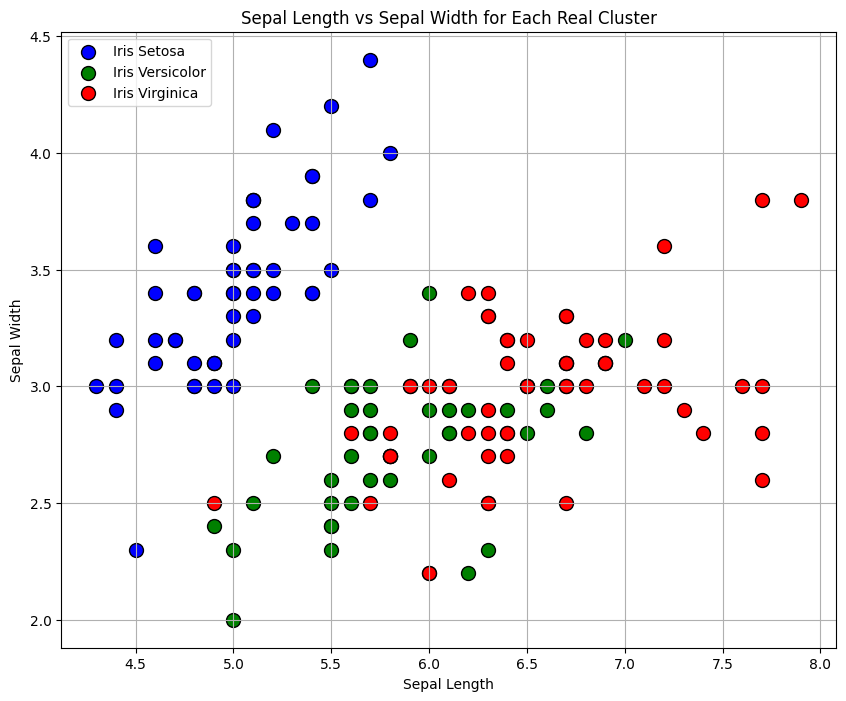

In [370]:
# Scatter plot of each real cluster for Sepal

plt.figure(figsize=(10,8))

# Setosa
plt.scatter(df_setosa['Sepal_Length'], df_setosa['Sepal_Width'], color='blue', label='Iris Setosa', s=100, edgecolor='k')
# Versicolor
plt.scatter(df_versicolor['Sepal_Length'], df_versicolor['Sepal_Width'], color='green', label='Iris Versicolor', s=100, edgecolor='k')
# Virginica
plt.scatter(df_virginica['Sepal_Length'], df_virginica['Sepal_Width'], color='red', label='Iris Virginica', s=100, edgecolor='k')

# Plot settings
plt.title('Sepal Length vs Sepal Width for Each Real Cluster')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()




Recall that for this dataset we know in advance the class to which each point belongs to

# Get variables **X** and labels **y**

In [371]:
# Select variables (one, two, three, four)
x  = dataset[["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"]].values
#X  = dataset[["Petal_Length", "Petal_Width"]].values
#X  = dataset[["Sepal_Length", "Sepal_Width"]].values

# Get the class of each observation
y  = dataset["Flower"].values


In [372]:
# Understand the data X
print(x)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [373]:
# Understand the data y
print(y)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

In [374]:
# Calculate the number of observations in the dataset
num_observations = dataset.shape[0]

num_observations


150

In [375]:
# Calculate the number of observations for class 0
num_class_0 = dataset[dataset['Species_Encoded'] == 0].shape[0]

num_class_0


50

In [376]:
# Calculate the number of observations for class 1
num_class_1 = dataset[dataset['Species_Encoded'] == 1].shape[0]

num_class_1


50

In [377]:
# Calculate the number of observations for class 2
num_class_2 = dataset[dataset['Species_Encoded'] == 2].shape[0]

num_class_2


50

# Train a classifier

## Train the classification model

In [378]:
# Import sklearn linear_model
from sklearn.linear_model import LogisticRegression

# Initialize the classifier
classifier = LogisticRegression()

# Fit the model to the training data

x = dataset_cleaned[['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']].values
y = dataset_cleaned['Species_Encoded'].values

classifier.fit(x, y)

classifier



LogisticRegression()

## Predict the class of a new observation

In [379]:
# Get a new observation
xnew = np.array([[5.5, 3.5, 1.5, 0.5]])
#xnew = np.array([[5.5, 2.5, 3.5, 1.5]])
#xnew = np.array([[6.5, 3.5, 5.5, 2.5]])

# Print the new observation
xnew


array([[5.5, 3.5, 1.5, 0.5]])

In [380]:
# Make the prediction using xnew
predicted_class = classifier.predict(xnew)

# Get the predicted class
predicted_class


array([0])

The question is, how accurate is the classification model?... we need to evaluate the performance of our classifier

# Evaluation of a classifier

## Split data in train and test sets

Holdout: spliting the dataset in train and test sets

In [381]:
# Import sklearn train_test_split
from sklearn.model_selection import train_test_split

# Split data in train and test sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

# Showing the shape of the split data
(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


((90, 4), (60, 4), (90,), (60,))

In [382]:
# Number of observations in the train set
num_train_observations = x_train.shape[0]

num_train_observations


90

In [383]:
# Number of observations of each class in the train set
unique, counts = np.unique(y_train, return_counts=True)
class_distribution_train = dict(zip(unique, counts))

class_distribution_train


{0: 30, 1: 29, 2: 31}

In [384]:
# Number of observations in the test set
num_test_observations = x_test.shape[0]

num_test_observations


60

In [385]:
# Number of observations of each class in the test set
unique, counts = np.unique(y_test, return_counts=True)
class_distribution_test = dict(zip(unique, counts))

class_distribution_test


{0: 20, 1: 21, 2: 19}

## Train the classification model

In [386]:
# Initialize the classifier
classifier = LogisticRegression()

# Fit the model to the training data


classifier.fit(x_train, y_train)

classifier


LogisticRegression()

## Test the classification model

In [387]:
# Make the predictions using the test set
y_pred = classifier.predict(x_test)

y_pred


array([0, 2, 2, 1, 0, 1, 0, 1, 1, 2, 0, 2, 2, 1, 2, 1, 0, 0, 2, 1, 1, 1,
       0, 2, 1, 0, 0, 0, 1, 1, 2, 1, 1, 2, 1, 2, 0, 0, 2, 1, 1, 0, 2, 2,
       0, 0, 1, 0, 0, 0, 1, 2, 2, 2, 0, 2, 2, 0, 1, 1])

In [388]:
# Explore real and predicted labels
comparison_df = pd.DataFrame({
    'Real Label': y_test,
    'Predicted Label': y_pred
})
comparison_df

,Real Label,Predicted Label
0,0,0
1,2,2
2,2,2
3,1,1
4,0,0
5,1,1
6,0,0
7,1,1
8,1,1
9,2,2


## Compute the acurracy

In [389]:
# Define a function to compute accuracy
def compute_accuracy(y_true, y_pred):
    correct_predictions = sum(y_true == y_pred)
    total_predictions = len(y_true)
    accuracy = correct_predictions / total_predictions
    return accuracy * 100


In [390]:
# Calculate total accuracy
accuracy = compute_accuracy(y_test, y_pred)
accuracy




96.66666666666667

In [391]:
# Calculate total accuracy using sklearn.metrics
from sklearn.metrics import accuracy_score

accuracy_sklearn = accuracy_score(y_test, y_pred) * 100

accuracy_sklearn


96.66666666666667

In [392]:
# Compute accuracy for class 0

y_test_class_0 = y_test[y_test == 0]
y_pred_class_0 = y_pred[y_test == 0]

if len(y_test_class_0) > 0:
    accuracy_class_0 = accuracy_score(y_test_class_0, y_pred_class_0) * 100
else:
    accuracy_class_0 = "No observations of class 0 in the test set."

accuracy_class_0

100.0

In [393]:
# Compute accuracy for class 1
y_test_class_1 = y_test[y_test == 1]
y_pred_class_1 = y_pred[y_test == 1]

if len(y_test_class_1) > 0:
    accuracy_class_1 = accuracy_score(y_test_class_1, y_pred_class_1) * 100
else:
    accuracy_class_1 = "No observations of class 0 in the test set."

accuracy_class_1


95.23809523809523

In [394]:
# Compute accuracy for class 2
y_test_class_2 = y_test[y_test == 2]
y_pred_class_2 = y_pred[y_test == 2]

if len(y_test_class_2) > 0:
    accuracy_class_2 = accuracy_score(y_test_class_2, y_pred_class_2) * 100
else:
    accuracy_class_2 = "No observations of class 0 in the test set."

accuracy_class_2


94.73684210526315

## Confussion matrix

In [395]:
# Compute confussion matrix (normalized confusion matrix)
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, normalize='true')

conf_matrix


array([[1.        , 0.        , 0.        ],
       [0.        , 0.95238095, 0.04761905],
       [0.        , 0.05263158, 0.94736842]])

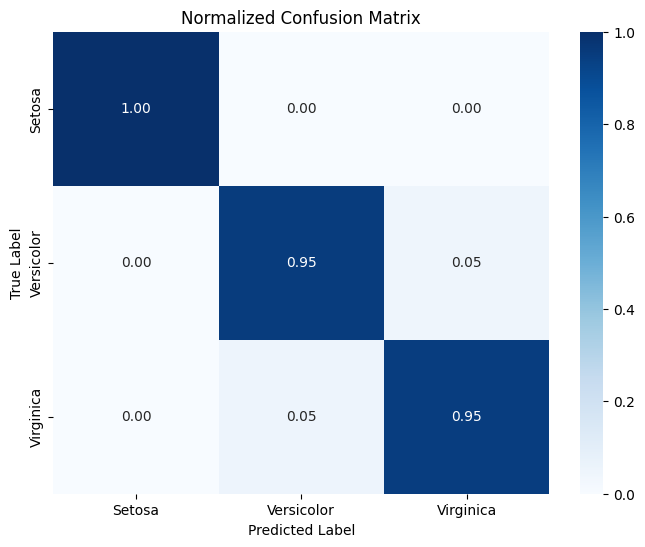

In [396]:
# Plot normalized confussion matrix

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='.2f', cmap='Blues', xticklabels=['Setosa', 'Versicolor', 'Virginica'], yticklabels=['Setosa', 'Versicolor', 'Virginica'])
plt.title('Normalized Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Final remarks

- Evaluation of classification model is critical

- Train and test set have to be mutually exclusive

- There are several alternatives: Holdout, Montecarlo, k-fold, repeated k-fold, Leave P Out (LPO), Leave One Out (LOO), Stratified k-fold

- https://scikit-learn.org/stable/modules/cross_validation.html

# Activity

1) Compare the accuracy of the classification using (a) the four variables, (b) the two Petal variables, and (c) the two Sepal variables. Which provides the best classification accuracy?

Everyone have a lot of accurancy

2) Using the four variables, try with two classifiers. Which provides the best performance?

Both the Logistic Regression and Support Vector Classifier resulted in 100% accuracy using the four variables. This suggests that the model's performance is struggling with the small dataset or the current split.



In [397]:
from sklearn.svm import SVC

# (a) Four variables: Sepal Length, Sepal Width, Petal Length, Petal Width
X_four_vars = dataset_cleaned[['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']].values

# (b) Two Petal variables: Petal Length, Petal Width
X_petal_vars = dataset_cleaned[['Petal_Length', 'Petal_Width']].values

# (c) Two Sepal variables: Sepal Length, Sepal Width
X_sepal_vars = dataset_cleaned[['Sepal_Length', 'Sepal_Width']].values

# Splitting the data for each case
X_train_four, X_test_four, y_train, y_test = train_test_split(X_four_vars, y, test_size=0.2, random_state=42)
X_train_petal, X_test_petal, _, _ = train_test_split(X_petal_vars, y, test_size=0.2, random_state=42)
X_train_sepal, X_test_sepal, _, _ = train_test_split(X_sepal_vars, y, test_size=0.2, random_state=42)

# Initializing the logistic regression classifier
classifier = LogisticRegression()

# (a) Fit and predict using four variables
classifier.fit(X_train_four, y_train)
y_pred_four = classifier.predict(X_test_four)
accuracy_four = accuracy_score(y_test, y_pred_four) * 100

# (b) Fit and predict using two Petal variables
classifier.fit(X_train_petal, y_train)
y_pred_petal = classifier.predict(X_test_petal)
accuracy_petal = accuracy_score(y_test, y_pred_petal) * 100

# (c) Fit and predict using two Sepal variables
classifier.fit(X_train_sepal, y_train)
y_pred_sepal = classifier.predict(X_test_sepal)
accuracy_sepal = accuracy_score(y_test, y_pred_sepal) * 100

(accuracy_four, accuracy_petal, accuracy_sepal)


# Trying two different classifiers: Logistic Regression and SVM (Support Vector Machine)

# Classifier 1: Logistic Regression
logistic_classifier = LogisticRegression()
logistic_classifier.fit(X_train_four, y_train)
y_pred_logistic = logistic_classifier.predict(X_test_four)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic) * 100

# Classifier 2: Support Vector Classifier (SVC)
svc_classifier = SVC()
svc_classifier.fit(X_train_four, y_train)
y_pred_svc = svc_classifier.predict(X_test_four)
accuracy_svc = accuracy_score(y_test, y_pred_svc) * 100

(accuracy_logistic, accuracy_svc)

(100.0, 100.0)